In [1]:
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
import pandas as pd
# import tensorflow as tf
# import keras
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
# from keras.models import Sequential


In [2]:
file_1 = "Wine_Data/winequality-red (1).csv"
file_2 = "Wine_Data/winequality-white.csv"

In [3]:
df_1 = pd.read_csv(file_1, sep='\;')

/Users/alexanderlorin/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [4]:
# red = 1 white = 0

In [5]:
# df_1['color']='1'

In [6]:
df_1

,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df_2 = pd.read_csv(file_2, sep='\;')

/Users/alexanderlorin/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [8]:
# df_2['color']= '0'

In [9]:
df_2

,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [10]:
# dataframes = [df_1, df_2]
# result_df = pd.concat(dataframes)

In [11]:
# result_df

In [12]:
from sklearn.preprocessing import QuantileTransformer


In [13]:
# color_dummy = pd.get_dummies(result_df['color'])
# color_dummy

In [14]:
df_1

,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
clean_df_r= df_1.rename(columns={'"fixed acidity':'fixed acidity',
           '""volatile acidity""':'volatile acidity',
                    '""citric acid""':'citric acid',
                    '""residual sugar""':'residual sugar',
                    '""chlorides""':'chlorides',
                    '""free sulfur dioxide""':'free sulfure dioxide',
                    '""total sulfur dioxide""':'total sulfur dioxide',
                    '""density""':'density',
                    '""pH""':'pH',
                    '""sulphates""':'sulphates',
                    '""alcohol""':'alcohol',
                    '""quality"""':'quality'})

In [16]:
clean_df_w= df_2.rename(columns={'"fixed acidity':'fixed acidity',
           '""volatile acidity""':'volatile acidity',
                    '""citric acid""':'citric acid',
                    '""residual sugar""':'residual sugar',
                    '""chlorides""':'chlorides',
                    '""free sulfur dioxide""':'free sulfure dioxide',
                    '""total sulfur dioxide""':'total sulfur dioxide',
                    '""density""':'density',
                    '""pH""':'pH',
                    '""sulphates""':'sulphates',
                    '""alcohol""':'alcohol',
                    '""quality"""':'quality'})

In [17]:
clean_df_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfure dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
clean_df_r['best quality']=[1 if x>=6 else 0 for x in clean_df_r.quality]
clean_df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfure dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [19]:
clean_df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfure dioxide  1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  best quality          1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


<AxesSubplot:>

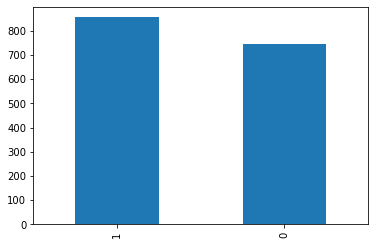

In [20]:
clean_df_r['best quality'].value_counts().plot(kind='bar')

In [21]:
clean_df_r['best quality'].unique()

array([0, 1])

In [22]:
X = clean_df_r.drop(columns ={'quality', 'best quality'}, axis = 1)
y = clean_df_r['best quality']

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfure dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [24]:
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 1.97418149, -0.23260309,  1.11458849, ..., -0.78641859,
        -1.3131938 , -1.15257747],
       [ 0.28189382,  0.37802632,  0.09088663, ...,  0.3161036 ,
        -0.97064635, -1.24703683],
       [-0.71013687,  0.32251456, -1.39348108, ...,  0.70522908,
        -0.62809889,  1.01998773],
       ...,
       [-0.65178213,  0.48904985, -1.08637052, ...,  1.28891729,
        -0.68519014, -0.8691994 ],
       [-0.2432989 , -1.84244427,  0.39799719, ...,  0.05668661,
         0.79918216,  1.39782516],
       [-1.46874859, -1.34283839, -0.06266865, ...,  0.51066634,
        -0.68519014,  2.90917487]])

In [26]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-3.60008393e-01,  1.55979263e-01, -9.84000334e-01, ...,
        -4.62147357e-01, -9.52314295e-05, -7.74740045e-01],
       [-3.01653646e-01, -1.77091327e-01, -5.23334494e-01, ...,
         5.10666338e-01, -1.02773759e+00, -8.69199402e-01],
       [ 1.39063402e+00,  7.66608676e-01, -2.67409028e-01, ...,
        -2.02730371e-01,  1.82682451e+00, -4.91361975e-01],
       ...,
       [-7.10136875e-01,  3.78026322e-01, -1.39348108e+00, ...,
         1.02950031e+00,  2.28269736e-01, -4.91361975e-01],
       [-3.01653646e-01,  4.89049852e-01, -1.13755561e+00, ...,
        -1.37876125e-01, -1.71368957e-01, -1.05811812e+00],
       [ 1.33227927e+00, -9.54256034e-01,  1.52406924e+00, ...,
        -1.11068982e+00,  3.42452220e-01,  6.42150306e-01]])

k: 1, Train/Test Score: 1.000/0.647
k: 3, Train/Test Score: 0.819/0.620
k: 5, Train/Test Score: 0.773/0.620
k: 7, Train/Test Score: 0.737/0.598
k: 9, Train/Test Score: 0.726/0.605
k: 11, Train/Test Score: 0.721/0.603
k: 13, Train/Test Score: 0.711/0.600
k: 15, Train/Test Score: 0.706/0.605
k: 17, Train/Test Score: 0.700/0.625
k: 19, Train/Test Score: 0.702/0.627
k: 21, Train/Test Score: 0.698/0.630
k: 23, Train/Test Score: 0.701/0.627
k: 25, Train/Test Score: 0.706/0.630
k: 27, Train/Test Score: 0.696/0.627
k: 29, Train/Test Score: 0.695/0.625
k: 31, Train/Test Score: 0.689/0.635
k: 33, Train/Test Score: 0.691/0.635
k: 35, Train/Test Score: 0.691/0.647
k: 37, Train/Test Score: 0.691/0.637
k: 39, Train/Test Score: 0.694/0.652
k: 41, Train/Test Score: 0.691/0.640
k: 43, Train/Test Score: 0.683/0.637
k: 45, Train/Test Score: 0.681/0.640
k: 47, Train/Test Score: 0.683/0.637
k: 49, Train/Test Score: 0.672/0.642


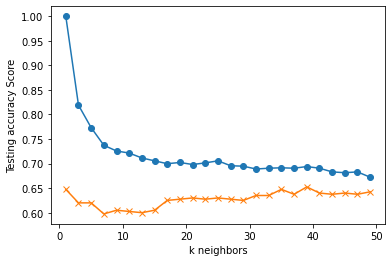

In [27]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
#number_input_features = 1199
hidden_nodes_layer1 =  6
hidden_nodes_layer2 = 2
#hidden_nodes_layer3 = 10
#hidden_nodes_layer4 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer 

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 2)                 14        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [29]:
X_train_scaled.shape

(1199, 11)

In [30]:
y_train.shape

(1199,)

In [31]:
# Define the checkpoint path and filenames
#os.makedirs("checkpoints_optimized_1/",exist_ok=True)
#checkpoint_dir_1 = "checkpoints_optimized_1/weights.{epoch:02d}.hdf5"

In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:

fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
38/38 [==============================] - 0s 814us/step - loss: 0.8353 - accuracy: 0.4721
Epoch 2/100
38/38 [==============================] - 0s 978us/step - loss: 0.7803 - accuracy: 0.4737
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.7377 - accuracy: 0.4787
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.5054
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5396
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.5721
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6205
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6564
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.6847
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.7006
Epoch

In [34]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

13/13 - 0s - loss: 0.5340 - accuracy: 0.7550 - 130ms/epoch - 10ms/step
Loss: 0.5339977145195007, Accuracy: 0.7549999952316284


In [35]:
# Export our model to HDF5 file
nn.save("Wine_Enthusiast_Optimization_r.h5")

In [36]:
len(X_train_scaled[0])

11

In [37]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6
#hidden_nodes_layer3 = 4
#hidden_nodes_layer4 = 5

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer 

nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                144       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [38]:
y_train

582     0
626     0
1030    1
620     0
490     1
       ..
1130    1
1294    1
860     0
1459    1
1126    1
Name: best quality, Length: 1199, dtype: int64

In [39]:
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
fit_model = nn_1.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
38/38 [==============================] - 0s 850us/step - loss: 0.7009 - accuracy: 0.5321
Epoch 2/100
38/38 [==============================] - 0s 855us/step - loss: 0.6480 - accuracy: 0.6389
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6947
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.7248
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.7423
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5429 - accuracy: 0.7465
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5329 - accuracy: 0.7456
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7531
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7531
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5159 - accuracy: 0.7573
Epoch

In [41]:
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

13/13 - 0s - loss: 0.5133 - accuracy: 0.7450 - 132ms/epoch - 10ms/step
Loss: 0.513297438621521, Accuracy: 0.7450000047683716


In [42]:
label_id=1
entry_count=0
total_count=0

for idx, entry in clean_df_r[clean_df_r['best quality']==label_id].iloc[:,0:11].iterrows():
    scaled_data=scaler.transform([entry.to_list()])
    response = model.predict(scaled_data)
    
    
    if response[0][0]>0.6:
        entry_count += 1
        
    total_count += 1
    
entry_count/total_count
    
    

NameError: name 'model' is not defined

In [43]:
print(total_count)
print(entry_count)

0
0


In [44]:
# Export our model to HDF5 file
nn_1.save("Wine_Enthusiast_Optimization_r_2.h5")

In [28]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_scaled,y_train)
y_pred=clf.predict(X_test_scaled)

In [29]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [30]:
clf.score(X_test_scaled,y_test)

0.7975

In [31]:
scaler.transform([clean_df_r.iloc[3,0:11].to_list()])

/Users/alexanderlorin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.68240775, -1.39835015,  1.47288414, -0.45889159, -0.27290049,
         0.11074459,  0.40087537,  0.67088848, -0.98098133, -0.45682517,
        -0.58582133]])

In [32]:
clf.predict(scaler.transform([clean_df_r.iloc[3,0:11].to_list()]))

/Users/alexanderlorin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [33]:
print(clean_df_r.iloc[3,0:11].to_list())

[11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8]


In [67]:
print(scaler.transform([clean_df_r.iloc[3,0:11].to_list()]))

[[ 1.68240775 -1.39835015  1.47288414 -0.45889159 -0.27290049  0.11074459
   0.40087537  0.67088848 -0.98098133 -0.45682517 -0.58582133]]


In [68]:
type(scaler.transform([clean_df_r.iloc[3,0:11].to_list()]))

numpy.ndarray

In [50]:
clf.predict(scaler.transform([clean_df_r.iloc[2,0:11].to_list()]))

array([0])

In [34]:
from joblib import dump, load

In [51]:

dump(clf, 'Wine_Enthusiast_RF_r.joblib') 

['Wine_Enthusiast_RF_r.joblib']

In [35]:
dump(scaler, 'scaler_RF_r.joblib') 

['scaler_RF_r.joblib']

In [52]:
clf = load('Wine_Enthusiast_RF_r.joblib') 

In [53]:
import numpy 

In [54]:
# nn_1.predict(numpy.array([[11.6,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8]]))
nn_1.predict(numpy.array([[11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00]]))

array([[4.306651e-20]], dtype=float32)

In [55]:
from keras.models import load_model

In [56]:
# Load the model
model = load_model("./Wine_Enthusiast_Optimization_r_2.h5", compile = True)

# Generate predictions for samples
predictions = model.predict(numpy.array([[11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00]]))
print(predictions)

# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[[4.306651e-20]]
[0]


In [57]:
predictions = model.predict(numpy.array([[7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8]]))
# predictions = model.predict(numpy.array([[10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6]]))
print(predictions)

[[1.3941242e-14]]


In [58]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[0]


In [59]:
predictions = model.predict(numpy.array([[10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6]]))
print(predictions)

[[0.2930287]]


In [60]:
predictions = model.predict(numpy.array([[5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9]]))
print(predictions)

[[0.]]


In [61]:
# Xnew = scaler.transform(numpy.array([[11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00]]))
# # make a prediction
# ynew = nn_1.predict(Xnew)


In [62]:
clean_df_r[clean_df_r["quality"]==8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfure dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,1
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,1
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,1
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,1
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,1
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,1
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8,1


<AxesSubplot:>

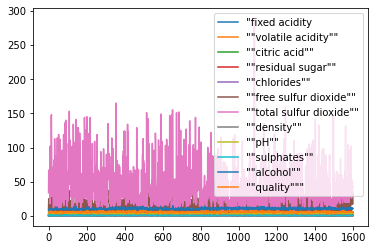

In [63]:
df_1.plot()

In [64]:
len(y == 1)

1599

In [65]:
clean_df_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfure dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
